In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder

In [53]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [57]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

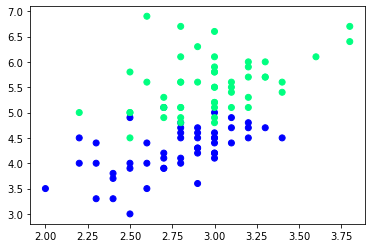

In [59]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [60]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [61]:
df_train

,SepalWidthCm,PetalLengthCm,Species
132,2.8,5.6,2
106,2.5,4.5,2
56,3.3,4.7,1
94,2.7,4.2,1
53,2.3,4.0,1
107,2.9,6.3,2
82,2.7,3.9,1
84,3.0,4.5,1
62,2.2,4.0,1
100,3.3,6.0,2


In [62]:
df_val

,SepalWidthCm,PetalLengthCm,Species
54,2.8,4.6,1
135,3.0,6.1,2
131,3.8,6.4,2
138,3.0,4.8,2
112,3.0,5.5,2


In [63]:
df_test

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
81,2.4,3.7,1
71,2.8,4.0,1
96,2.9,4.2,1
103,2.9,5.6,2


In [64]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [65]:
y_test

array([1, 2, 2, 2, 2])

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [67]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

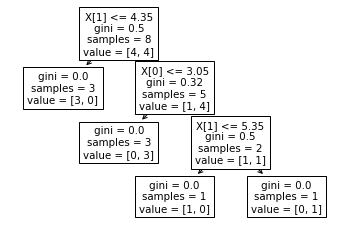

0.8


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


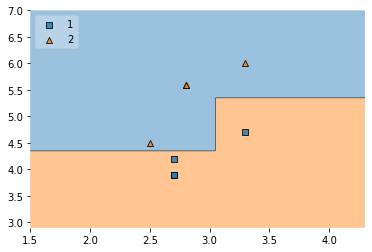

In [68]:
#Bagging

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

dt_bag1 = DecisionTreeClassifier()

evaluate(dt_bag1,X,y)

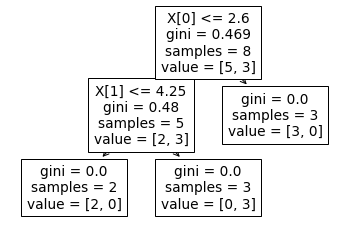

0.2


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


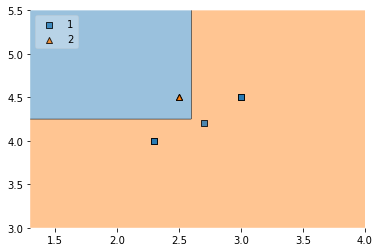

In [69]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag


dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

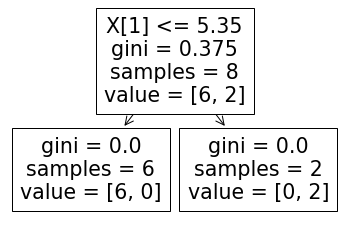

0.8


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


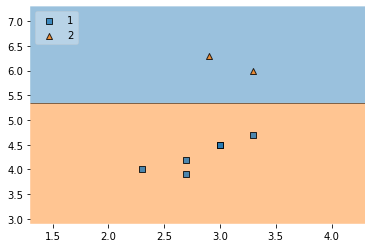

In [70]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [71]:
df_test

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
81,2.4,3.7,1
71,2.8,4.0,1
96,2.9,4.2,1
103,2.9,5.6,2


In [74]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,5.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [75]:
#using direct Library


from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [76]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy:", accuracy_score(y_test, y_pred))

Decision Tree accuracy: 0.8915


In [87]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,#same rows may be repeated
    random_state=42
)

SyntaxError: invalid syntax (<ipython-input-87-60d96a9f95ca>, line 7)

In [81]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [82]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.933

In [83]:

bag.estimators_samples_[0].shape

(4000,)

In [84]:

bag.estimators_features_[0].shape

(10,)

In [88]:
#Bagging using SVM
bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM",accuracy_score(y_test,y_pred))

Bagging using SVM 0.888


In [86]:
#Pasting

bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)


bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.5s remaining:   13.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Pasting classifier 0.9345


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


In [89]:
#Random Subspaces

bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1
)

bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))

Random Subspaces classifier 0.925


In [91]:
#Random Patches

bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.922


In [92]:
#OOB Score

bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)


bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [93]:
bag.oob_score_

0.92675

In [94]:

y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9335


In [ ]:
#Tips 
#Bagging generally gives better results than Pasting
#Good results come around the 25% to 50% row sampling mark
#Random patches and subspaces should be used while dealing with high dimensional data
#To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

In [95]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.6,0.8],
    'bootstrap' : [True,False],
    'max_features' : [0.4,0.6,0.8,1.0]
    }

In [97]:
search = GridSearchCV(BaggingClassifier(),parameters,cv=5)
search.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
search.best_params_
search.best_score_

In [ ]:
search.best_params_